in general time series analysis should have two coloumn. One is time and other is the one that you want to predict.

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") #optional
plt.style.use('fivethirtyeight') #optional
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_csv('karachi-weather-2021-2023.csv')
df.head()

,datetime,temp
0,1/1/2021,15.0
1,1/2/2021,15.4
2,1/3/2021,15.6
3,1/4/2021,16.3
4,1/5/2021,17.1


In [4]:
df.shape

(846, 2)

Question 1 : Aggregate the data into weekly mean. Use .resample('W').mean()

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])
weather = df.set_index('datetime') #setting order date as index.
weather = weather['temp'].resample('W').mean()

In [6]:
weather

datetime
2021-01-03    15.333333
2021-01-10    16.028571
2021-01-17    17.085714
2021-01-24    19.457143
2021-01-31    17.800000
                ...    
2023-04-02    26.414286
2023-04-09    27.328571
2023-04-16    27.628571
2023-04-23    29.414286
2023-04-30    29.700000
Freq: W-SUN, Name: temp, Length: 122, dtype: float64

Question 2 : Read the dataset visualize the trend, seasonality, residual etc. Discuss your
observations in the visualization.

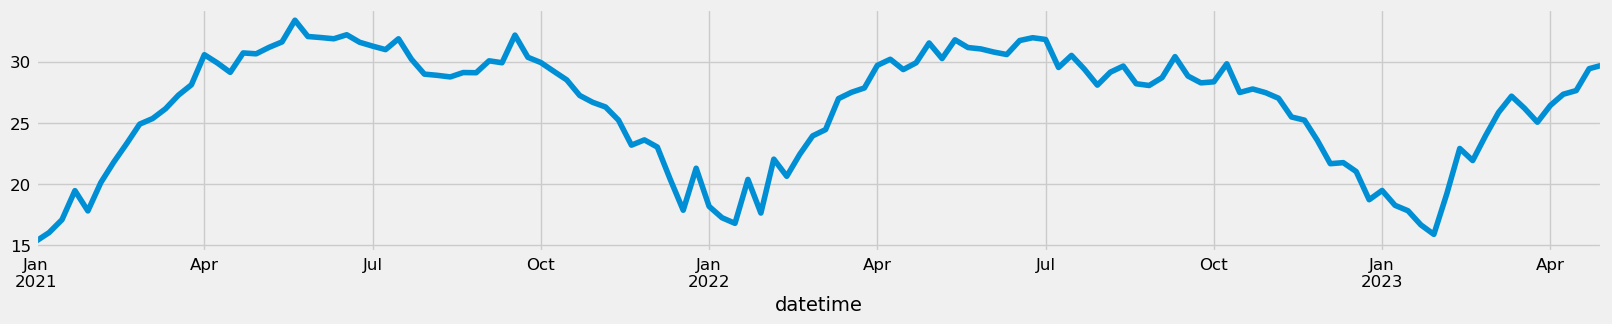

In [7]:
weather.plot(figsize=(18, 3))
plt.show()

This plot help us to visualize temperature trend in karachi from Jan 2021 to April 2023. It is clearly showing a consistent behaviour in the temperature varaition over the Months. January and Febrauary records the lowest temperature. While May and June observes highest temperature.

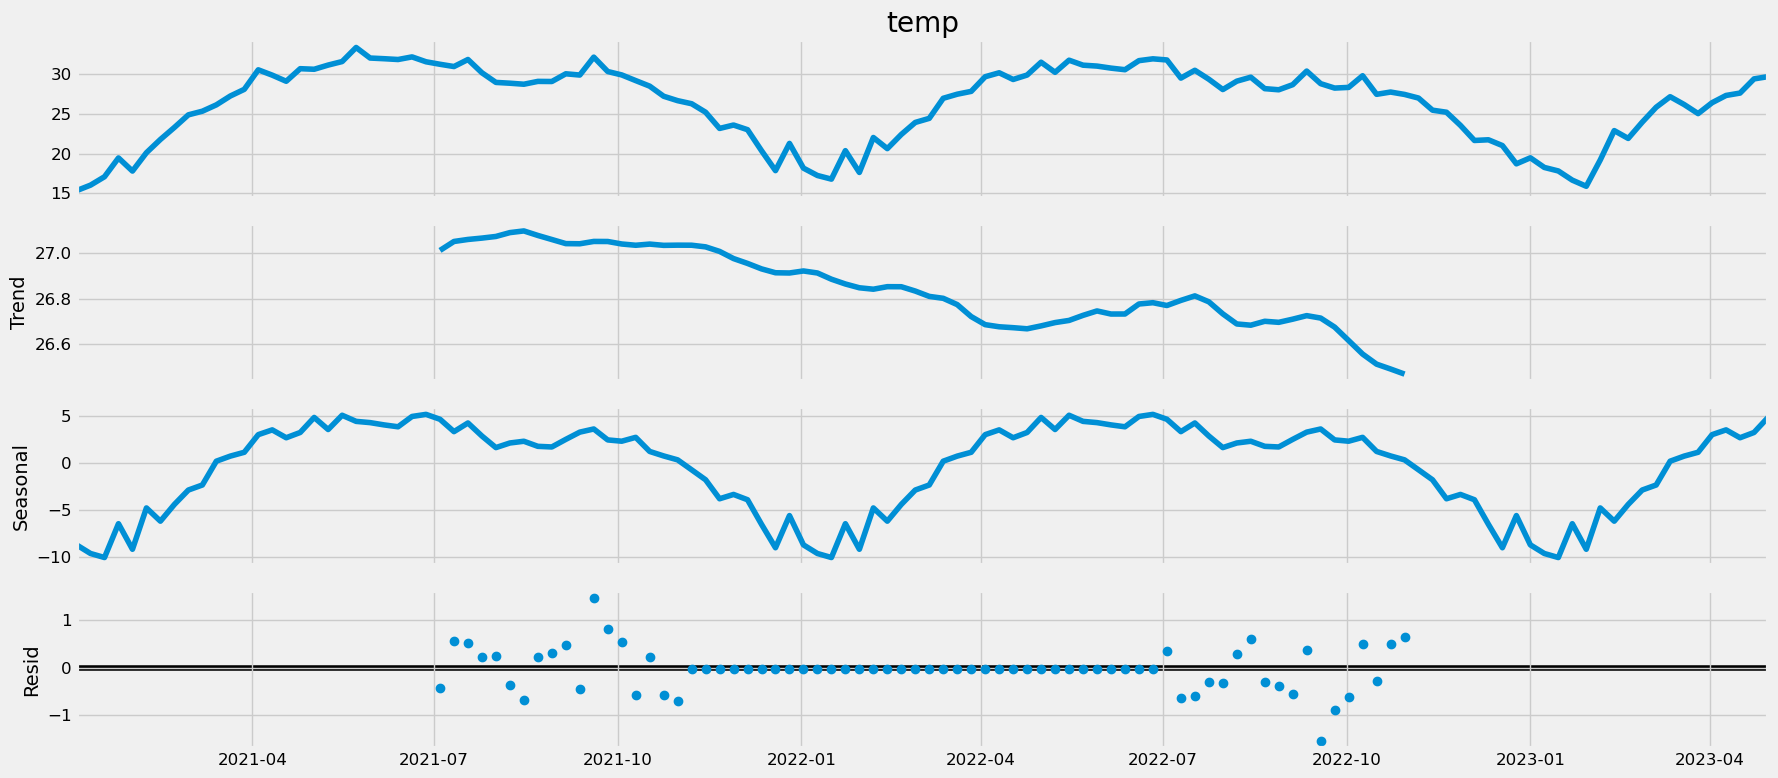

In [8]:
decomposition = sm.tsa.seasonal_decompose(weather, model='additive')
rcParams['figure.figsize'] = 18, 8
fig = decomposition.plot()
plt.show()

The first gragh is same as explained before. 

The second graph shows the trend for the temperature changes. This shows that after from August 2021 the trend is decreasing but it decreases steadily from October 2023.

Third graph, i.e Sesonal shows the pattern with respect to months. It can be observed that high temperature is observed in the middle of the year i.e May, June and July while start and end months have gradual temeperature increase/ decrease respectively.

The third graph shows variability in the temperature. It shows that greatest change is observed between and including the the month of August and Novemeber.

Question 3. Split the data into train and test sets. Use all the data for 2021-2022 for training and
2023 for testing.

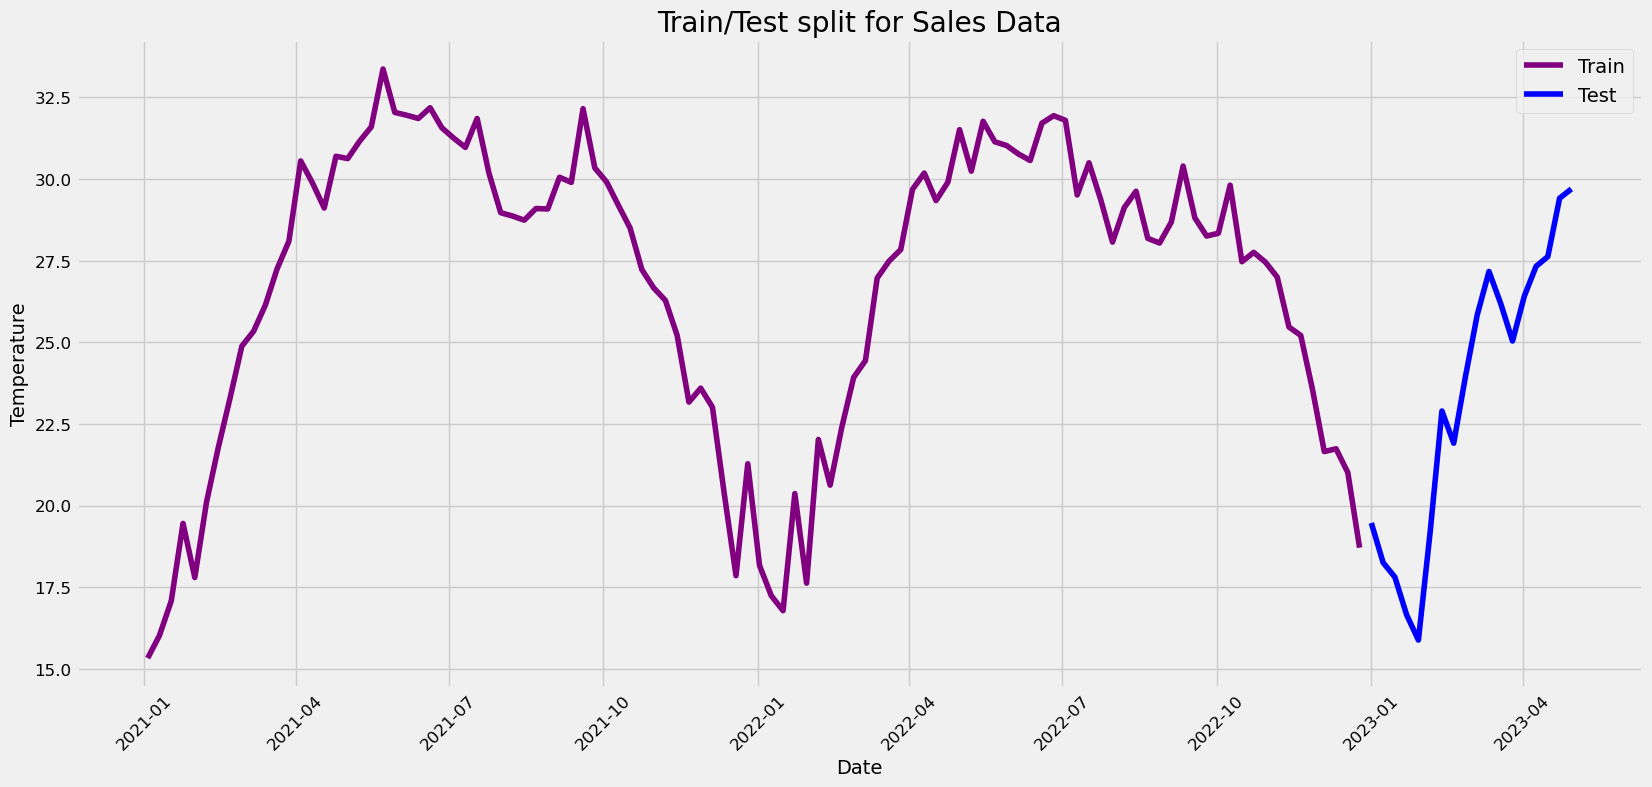

In [38]:
train = weather[weather.index <= pd.to_datetime("2022-12-31", format='%Y-%m-%d')]
test = weather[weather.index >= pd.to_datetime("2022-12-31", format='%Y-%m-%d')]

plt.plot(train, color = "purple", label = 'Train')
plt.plot(test, color = "blue", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.legend()
plt.show()

This code simply divides our data into testing (blue graph) and training sets (purple graph.) The data for year 2021-2022 is for training and 2023 for testing. X axis shows the independent variable that is "Date" while y axis represents depedent varaible that is "Temperature." 

Question 4. Use ARIMA, visualize the results and report the RMSE.

In [39]:
from statsmodels.tsa.arima.model import ARIMA

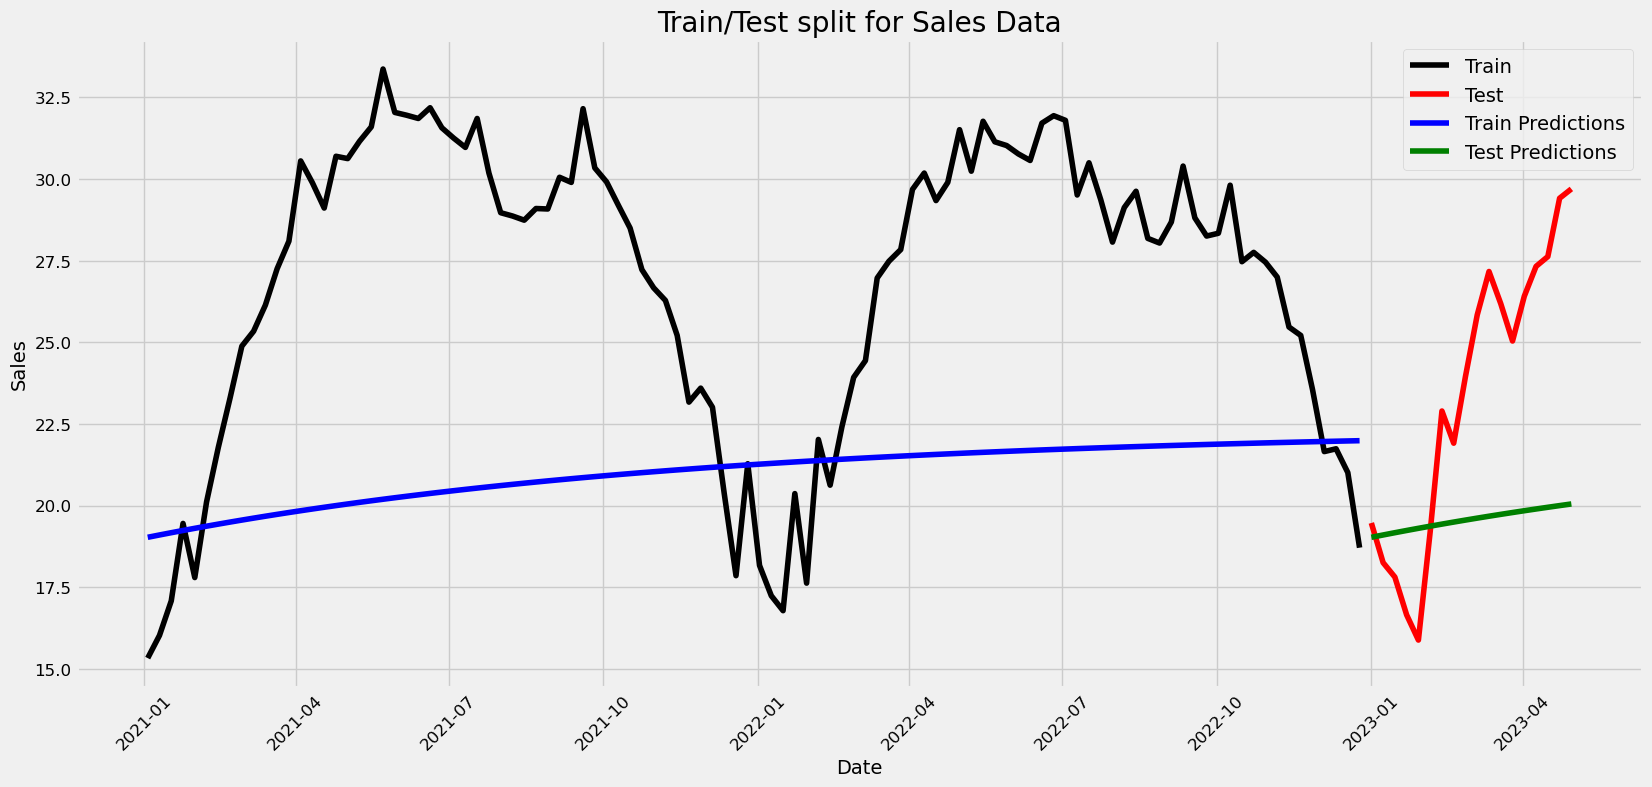

RMSE:  5.584076088881663


In [41]:
ARIMAmodel = ARIMA(train, order = (1, 0, 1))

ARIMAmodel = ARIMAmodel.fit()

#Train set prediction
y_pred_train = ARIMAmodel.get_forecast(len(train.index)) #only providing dates (test.index) from test as input for temperature forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05) 
y_pred_df_train["Predictions"] = ARIMAmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1])

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Test set prediction
y_pred = ARIMAmodel.get_forecast(len(test.index)) #only providing dates (test.index) from test as input for temperature forecasting
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [42]:
print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  104
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -184.529
Date:                Tue, 05 Dec 2023   AIC                            377.058
Time:                        17:37:29   BIC                            387.636
Sample:                    01-03-2021   HQIC                           381.343
                         - 12-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.3471      4.040      5.531      0.000      14.429      30.266
ar.L1          0.9786      0.025     39.421      0.000       0.930       1.027
ma.L1         -0.1002      0.090     -1.118      0.2

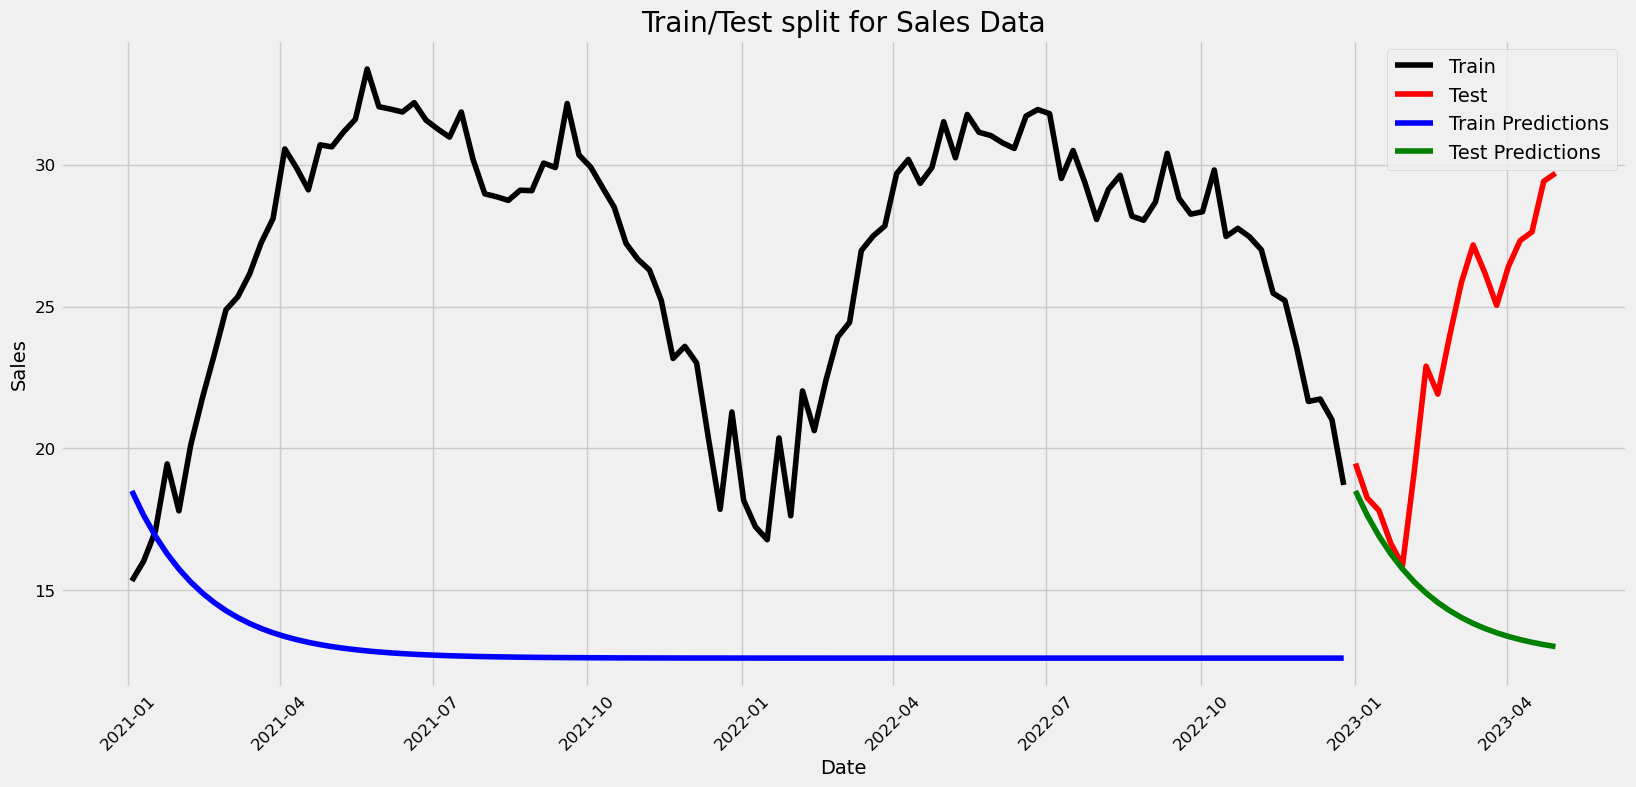

RMSE:  10.42846664619311


In [49]:
ARIMAmodel = ARIMA(train, order = (1, 1, 2))
ARIMAmodel = ARIMAmodel.fit()

#Train set prediction
y_pred_train = ARIMAmodel.get_forecast(len(train.index)) #only providing dates (test.index) from test as input for forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05) 
y_pred_df_train["Predictions"] = ARIMAmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1])

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Test set prediction
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [51]:
print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  104
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -166.894
Date:                Tue, 05 Dec 2023   AIC                            349.788
Time:                        17:49:33   BIC                            370.943
Sample:                    01-03-2021   HQIC                           358.359
                         - 12-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7530      1.595     16.146      0.000      22.627      28.879
ar.L1          0.9897      0.241      4.111      0.000       0.518       1.462
ar.L2          0.8350      0.429      1.944      0.0

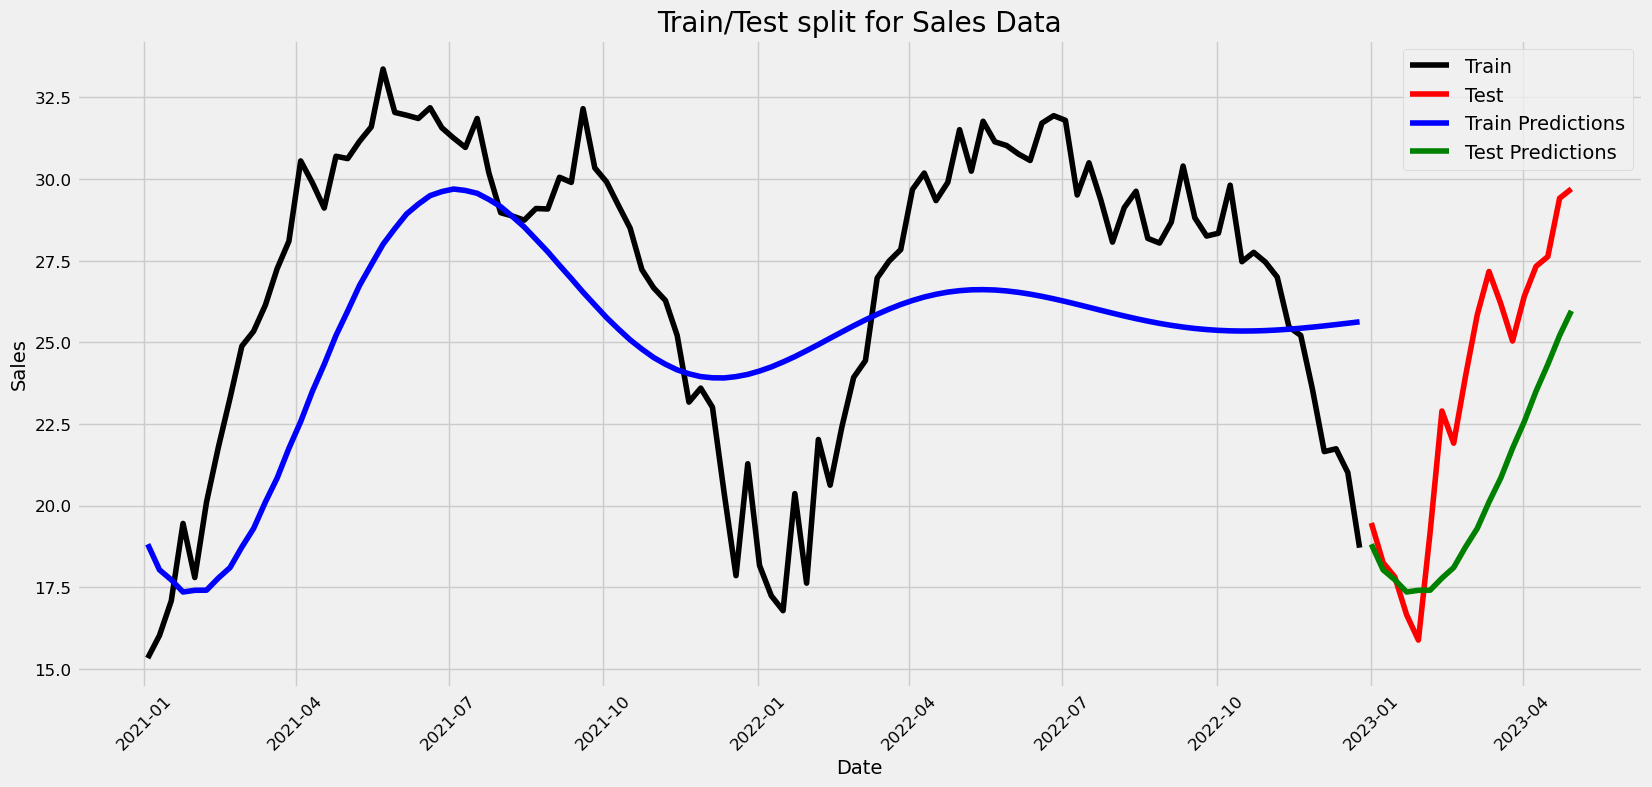

RMSE:  3.9313030183347606


In [50]:
ARIMAmodel = ARIMA(train, order = (3,0,3))
ARIMAmodel = ARIMAmodel.fit()

#Train set prediction
y_pred_train = ARIMAmodel.get_forecast(len(train.index)) #only providing dates (test.index) from test as input for forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05) 
y_pred_df_train["Predictions"] = ARIMAmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1])

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Train set prediction
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [52]:
print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  104
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -166.894
Date:                Tue, 05 Dec 2023   AIC                            349.788
Time:                        17:49:41   BIC                            370.943
Sample:                    01-03-2021   HQIC                           358.359
                         - 12-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7530      1.595     16.146      0.000      22.627      28.879
ar.L1          0.9897      0.241      4.111      0.000       0.518       1.462
ar.L2          0.8350      0.429      1.944      0.0

We have modelled ARIMA via 3 different cases. We can see that the least RMSE is obtained through order = (3,0,3) among order (1,0,1) and (1,1,2). Lower the root mean sq value lower are the variations from the actual data and hence more accurate is our model. The RMSE value obtained at order (3,0,3) is 3.931 which is the smallest among all the value hence it most closely models the given data set. 

5. Use SARIMA, visualize the results and report the RMSE. Use ‘52’ as the fourth
parameter of seasonal_order (for example seasonal_order=(0, 0, 0, 52))
since there are 52 weeks in a year

C:\Users\NCS\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


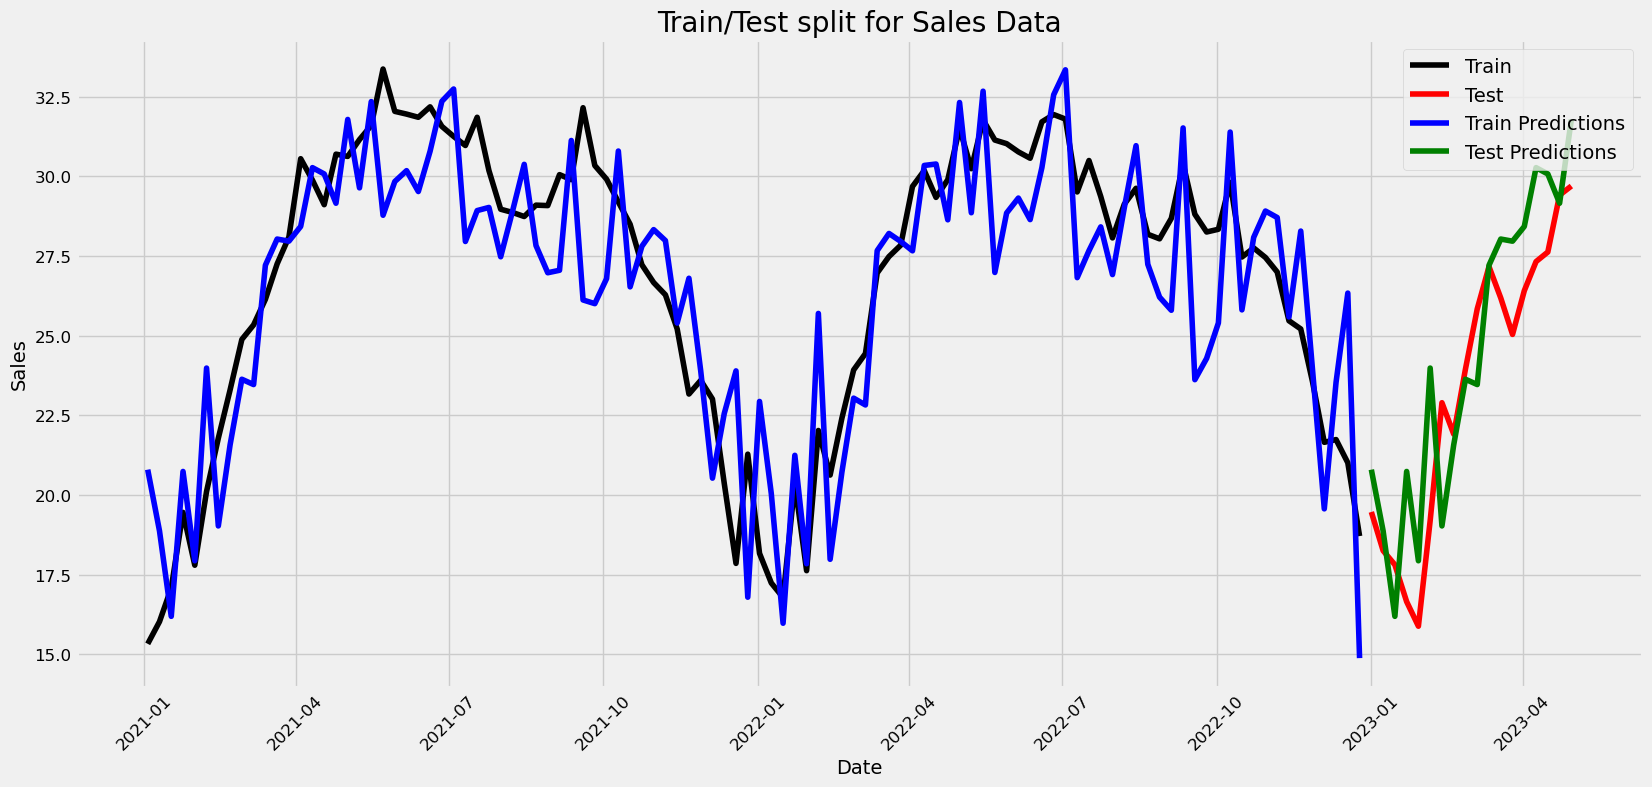

RMSE:  2.4104536294358874


In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAXmodel = SARIMAX(train, order=(3, 0, 3),seasonal_order=(1, 1, 0, 52)) 
SARIMAXmodel = SARIMAXmodel.fit()
# we chose 12 in seasonal_order because our data in in months (12 months in a year)

#Train set prediction
y_pred_train = SARIMAXmodel.get_forecast(len(train.index)) #only providing dates (train.index) from train as input for forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05) 
y_pred_df_train["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1])

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Test set prediction
y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [56]:
print(SARIMAXmodel.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                temp   No. Observations:                  104
Model:             SARIMAX(3, 0, 3)x(1, 1, [], 52)   Log Likelihood                 -82.377
Date:                             Tue, 05 Dec 2023   AIC                            180.755
Time:                                     18:38:21   BIC                            196.365
Sample:                                 01-03-2021   HQIC                           186.739
                                      - 12-25-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4837      0.296      1.631      0.103      -0.097       1.065
ar.L2         -0.6665      

Using SARIMAX we have added additional paremeter. We can see reduction in RMSE value, therefore our model has become more accurate.  

We included all the parameters of our ARIMA model i.e. Trend autoregression order, trend difference order, and trend moving average order. But in SARIMAX we are also considering the trend season orders.

Our new RMSE value is 2.4104 which means our prediction will usually differ from the accurate value with 2.4104 units. SARIMAX also follow the trends and seasonal order found in the data. 

Hence SARIMAX model is more accurate than ARIMA model.

6. Try to come up with optimal parameters for SARIMA. Pick the best one, visualize the
results and then report the RMSE. Compare both ARIMA and SARIMA and
conclude which one is better?


In [62]:
p = d = q = range(0, 2)
P = Q = D = range(1, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(P, Q, D))]

In [63]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(1, 1, 1, 52)12 - AIC:6.0
SARIMAX(0, 0, 1)x(1, 1, 1, 52)12 - AIC:8.0
SARIMAX(0, 1, 0)x(1, 1, 1, 52)12 - AIC:6.0
SARIMAX(0, 1, 1)x(1, 1, 1, 52)12 - AIC:8.0
SARIMAX(1, 0, 0)x(1, 1, 1, 52)12 - AIC:8.0
SARIMAX(1, 0, 1)x(1, 1, 1, 52)12 - AIC:10.0
SARIMAX(1, 1, 0)x(1, 1, 1, 52)12 - AIC:8.0
SARIMAX(1, 1, 1)x(1, 1, 1, 52)12 - AIC:10.0


In [64]:
# Ideal value: SARIMAX(0, 0, 0)x(1, 1, 1, 52)12 - AIC:6.0

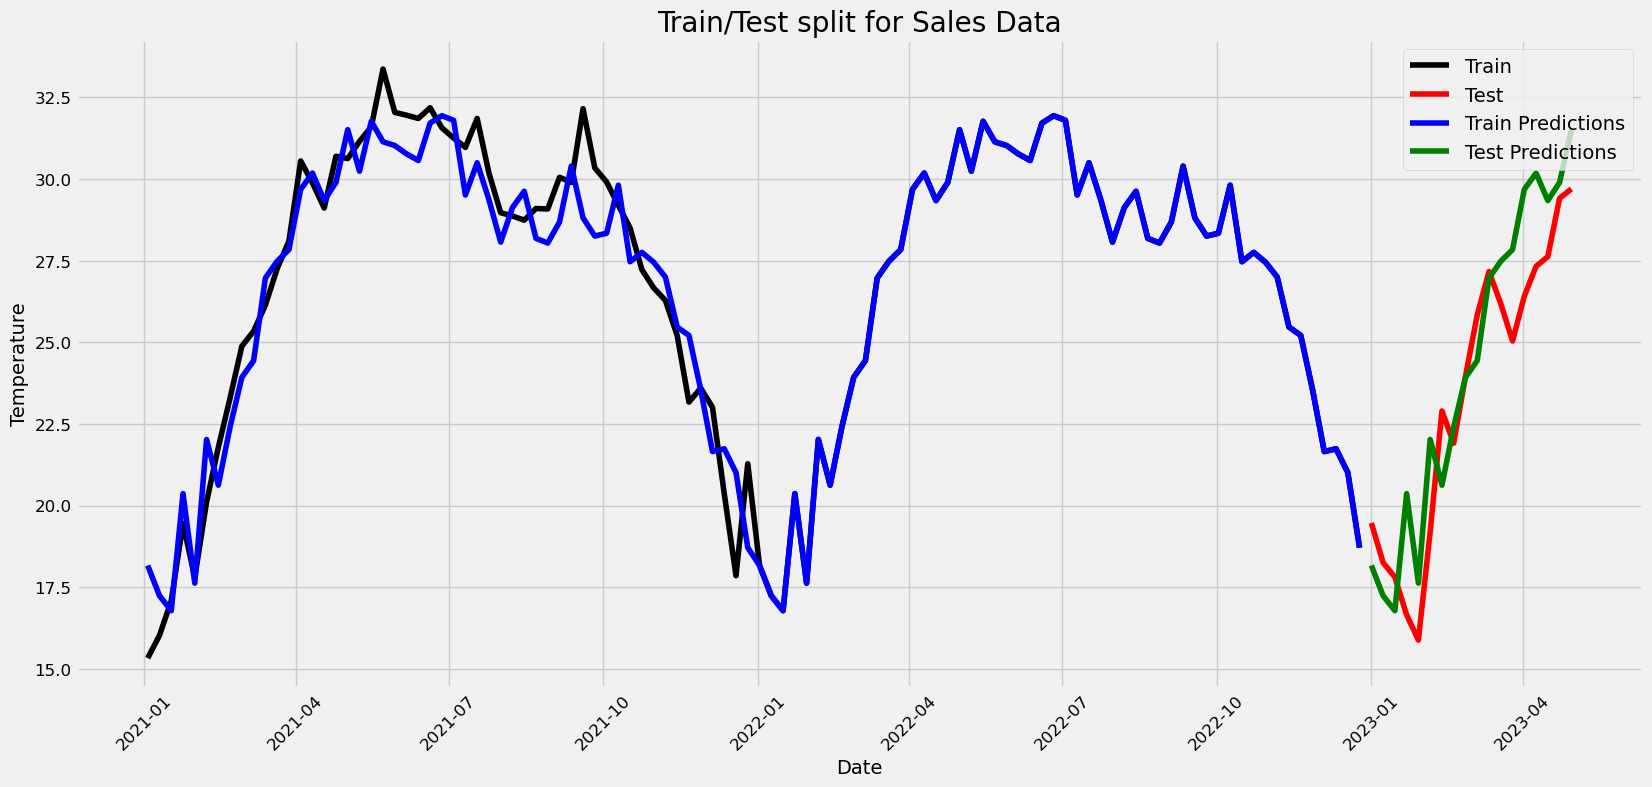

RMSE:  1.984415448239469


In [67]:
# Use optimal parameters from above with lowest AIC

from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAXmodel = SARIMAX(train, order=(0, 0, 0),seasonal_order=(1, 1, 1, 52)) 
SARIMAXmodel = SARIMAXmodel.fit()
# we chose 12 in seasonal_order because our data in in months (12 months in a year)

#Train set prediction
y_pred_train = SARIMAXmodel.get_forecast(len(train.index)) #only providing dates (train.index) from train as input for forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05) 
y_pred_df_train["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1])

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Test set prediction
y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

Via optimal parameter for SARIMA i.e. (0, 0, 0)x(1, 1, 1, 52) we are getting Lowest RMSE value that is 1.9844.
To do that we have changed Trend autoregression order and trend moving average order for ARIMA parameters in the previous model. Now our SARIMA model is more closely following the temperature trend for both test and trained data.

SARIMA is definetely better than ARIMA in terms of accuracy of the prediction. However, ARIMA is more simple to implement as SARIMA requires some additional parameter which we have to optimize. So for dataset with minimal fluctuations and trends ARIMA may work but for complex data set like these, with significant variation, ARIMA would fail to provide satisfiable results. Hence we would prefer SARIMAX.

7. Now use any two Machine Learning regressor techniques and use the same training
and testing set (used for ARIMA and SARIMA). Visualize the results and report the
RMSE.

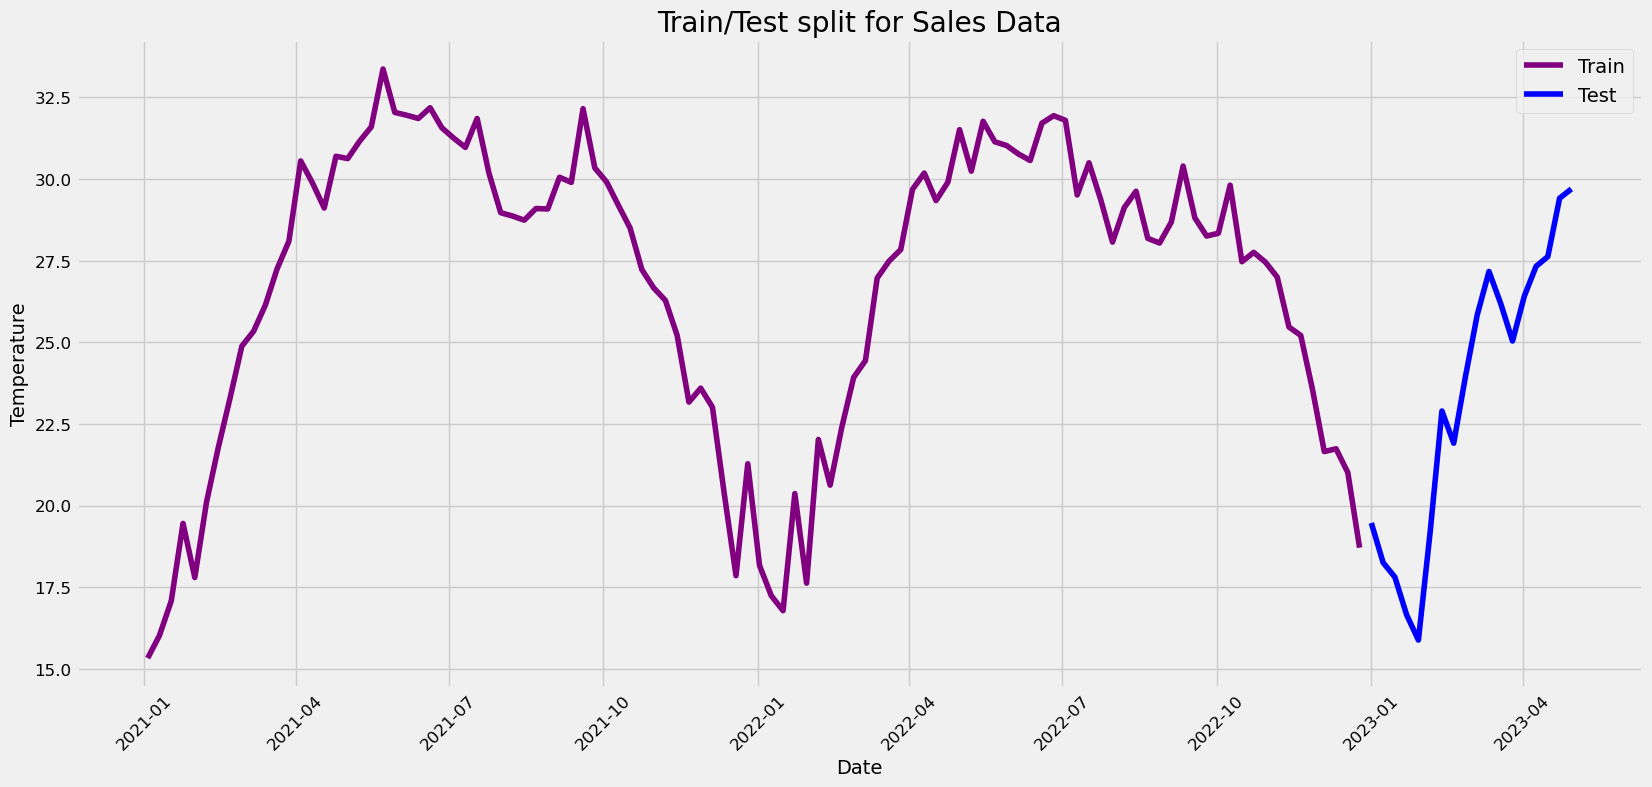

In [72]:
train = weather[weather.index <= pd.to_datetime("2022-12-31", format='%Y-%m-%d')]
test = weather[weather.index >= pd.to_datetime("2022-12-31", format='%Y-%m-%d')]

plt.plot(train, color = "purple", label = 'Train')
plt.plot(test, color = "blue", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.legend()
plt.show()

In [73]:
train.index

DatetimeIndex(['2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21',
               '2021-02-28', '2021-03-07',
               ...
               '2022-10-23', '2022-10-30', '2022-11-06', '2022-11-13',
               '2022-11-20', '2022-11-27', '2022-12-04', '2022-12-11',
               '2022-12-18', '2022-12-25'],
              dtype='datetime64[ns]', name='datetime', length=104, freq='W-SUN')

In [74]:
train

datetime
2021-01-03    15.333333
2021-01-10    16.028571
2021-01-17    17.085714
2021-01-24    19.457143
2021-01-31    17.800000
                ...    
2022-11-27    23.557143
2022-12-04    21.657143
2022-12-11    21.742857
2022-12-18    21.014286
2022-12-25    18.714286
Freq: W-SUN, Name: temp, Length: 104, dtype: float64

In [75]:
import numpy as np
 
# extract the seasonality data
months = [x.month for x in train.index]
years = [x.year for x in train.index]
day = [x.day for x in train.index]
 
# convert into one matrix
X = np.array([day, months, years]).T
Y = train.values

In [76]:
# extract the day, month and year data
tmonths = [x.month for x in test.index]
tyears = [x.year for x in test.index]
tday = [x.day for x in test.index]
 
# convert into one matrix
testX = np.array([tday, tmonths, tyears]).T
testY = test.values

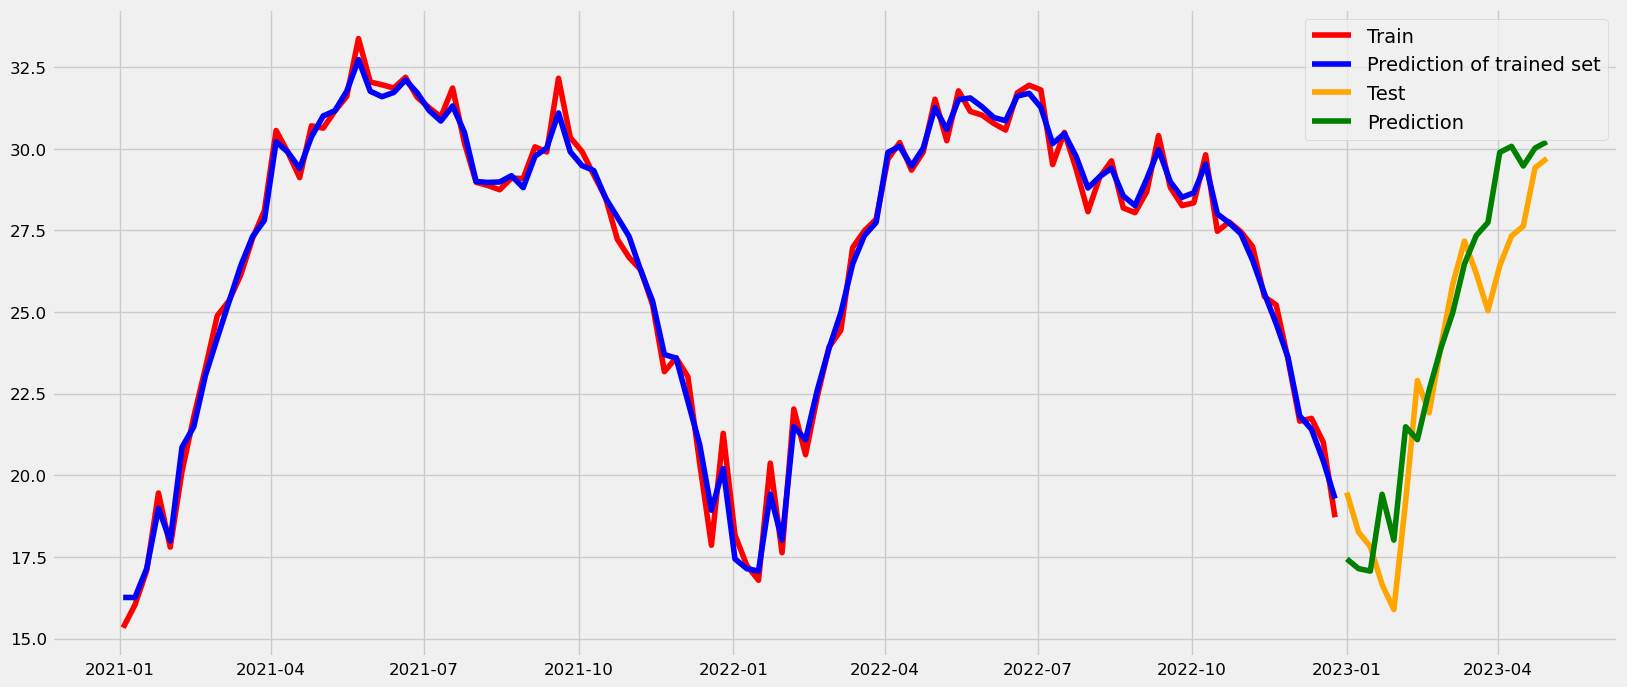

RMSE:  1.8344142537047177


In [84]:
from sklearn.ensemble import RandomForestRegressor # We are using regressor because we are using numerical values.
 
# fit the model
rfmodel = RandomForestRegressor()
rfmodel.fit(X,Y)

# predict for the test set period
preds_train = rfmodel.predict(X)

# predict for the test set period
preds = rfmodel.predict(testX)
 
# plot what has been learned
plt.plot(train.index, train.values,color="red", label='Train')
plt.plot(train.index, preds_train,color="blue", label='Prediction of trained set')
plt.plot(test.index, test.values,color="orange", label='Test')
plt.plot(test.index, preds, color="green",label='Prediction')
plt.legend()
plt.show()
rf_rmse = np.sqrt(mean_squared_error(test.values, preds))
print("RMSE: ",rf_rmse)

The RMSE value of 1.834 signifies that our model will predict around 1.834 units from the actual value while predicting the results. This can also be visualised by the following the green line for the test data set. Our prediction graph resembles to the actual test graph to a very large extent. Hence doing time series analysis using regression as our Machine Learning model produces good results.

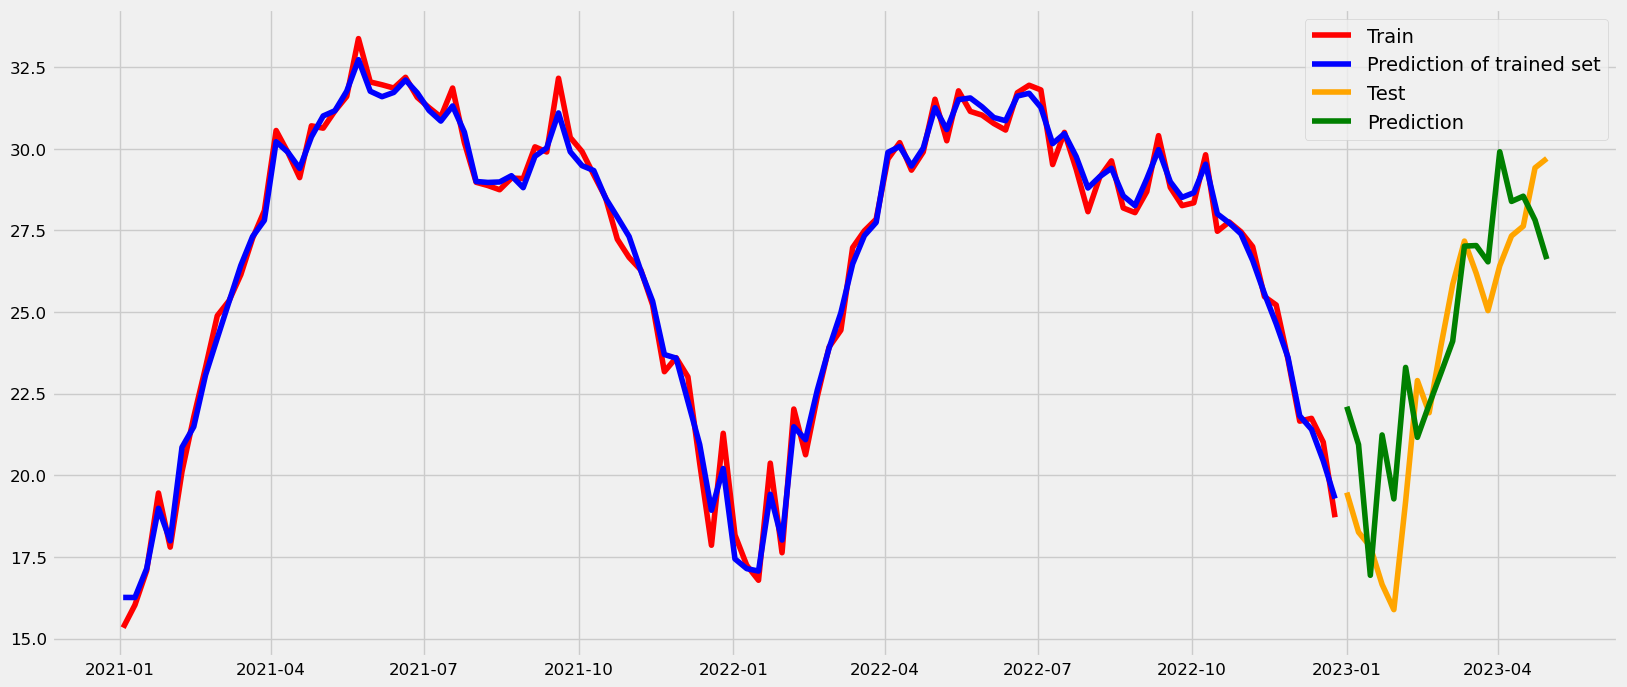

RMSE:  2.3588046078715124


In [89]:
#Using Support Vector Regression
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X, Y)

preds = svr.predict(testX)

#plotting what has been learned
plt.plot(train.index, train.values,color="red", label='Train')
plt.plot(train.index, preds_train,color="blue", label='Prediction of trained set')
plt.plot(test.index, test.values,color="orange", label='Test')
plt.plot(test.index, preds, color="green",label='Prediction')
plt.legend()
plt.show()

rf_rmse = np.sqrt(mean_squared_error(test.values, preds))
print("RMSE: ",rf_rmse)

The value of 2.35 signifies that our prediction model deviates from the actual value by just 2.35 units. We can see that our model deviates majorly  at the top and bottom of the test data set. Overall our model gives us the satifactory and usable results. 

8. Compare all the RMSEs (ARIMA, SARIMA and two regression algorithms) and
discuss which one is better.


By ARIMA: 3.931
By SARIMA: 1.98
By RandomForestRegressor: 1.834
By Support Vector Regression: 2.35

By noticing the RMSE values closely we can notice that SARIMA and RandomForestRegressor are one of the best models to predict the values from the dat set. However, in our case RandomForestRegressor is the best estimator since it is providing the least RMSE value. ARIMA wouldnt be a good choice as our data set is having a lot of fluctuations and hence it wouldnt be able to correctly map the model. We can also notice the graph of RandomForestRegressor model which resembles our actual data graph. Support Vector Regression is also a good model for prediction. It is better than ARIMA but not prefered over RandomForestRegressor.

9. Generate future dates (weekly) from April 1st 2023 to December 31
th 2023 and predict
the price using SARIMA model (with optimal parameters). Use
pd.date_range(start='01/04/2023', end='31/12/2023',
freq='W')


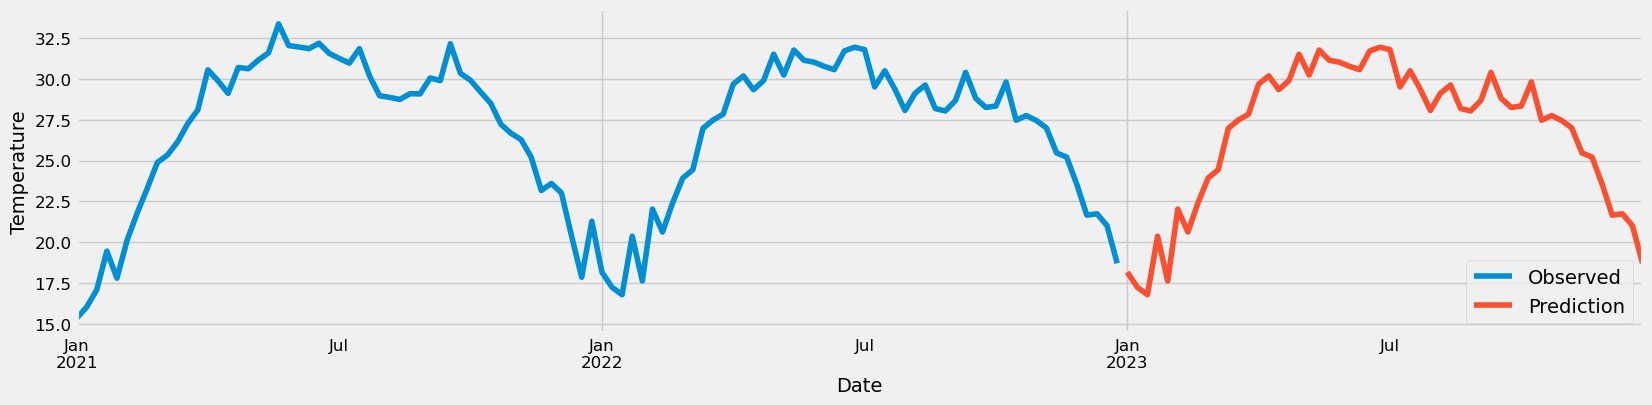

In [100]:
futureX = pd.date_range(start='01/04/2023', end='31/12/2023',freq='W')

train_set = weather[weather.index <= pd.to_datetime("2022-12-31", format='%Y-%m-%d')]


#Defining the SARIMA model with optimal parameters
order = (0,0,0)
seasonal_order = (1, 1, 1, 52) # 52 weeks in a year
SARIMAXmodel = SARIMAX(train_set, order=order, seasonal_order=seasonal_order)

#Fitting the model to the training data
SARIMAXfit = SARIMAXmodel.fit()

#Generating predictions for the future dates
pred_u = SARIMAXfit.get_forecast(steps=len(futureX))
pred_c = pred_u.conf_int()

#Plotting the observed data and the forecast
ax = train_set.plot(label='Observed', figsize=(18, 4))
pred_u.predicted_mean.plot(ax=ax, label='Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend()
plt.show()

 Correlation between date and temperature for both observed and forecasted date is displayed in the above graph. The pattern noticed in Observed data (Blue graph) can also be seen in the predicted data (Orange graph.) Hence one can be assured about usabilty of our results which would resemble to the actual data.  

10. Using the same future dates, predict the price using any one ML regression model 


In [149]:
futureX = pd.date_range(start='01/04/2023', end='31/12/2023',freq='W')
futureX = pd.to_datetime(futureX)

train = weather[weather.index <= pd.to_datetime("2022-12-31", format='%Y-%m-%d')]

In [150]:
import numpy as np
 
# extract the seasonality data
months = [x.month for x in train.index]
years = [x.year for x in train.index]
day = [x.day for x in train.index]
 
# convert into one matrix
X = np.array([day, months, years]).T
Y = train.values

In [151]:
# extract the day, month and year data

tmonths = [x.month for x in futureX]
tyears = [x.year for x in futureX]
tday = [x.day for x in futureX]

testX = np.array([tday, tmonths, tyears]).T

In [152]:
testX[:10]

array([[   8,    1, 2023],
       [  15,    1, 2023],
       [  22,    1, 2023],
       [  29,    1, 2023],
       [   5,    2, 2023],
       [  12,    2, 2023],
       [  19,    2, 2023],
       [  26,    2, 2023],
       [   5,    3, 2023],
       [  12,    3, 2023]])

In [153]:
from sklearn.ensemble import RandomForestRegressor # We are using regressor because we are using numerical values.
 
# fit the model
rfmodel = RandomForestRegressor()
rfmodel.fit(X,Y)

# predict for the test set period
preds = rfmodel.predict(testX)
preds

array([17.06485714, 16.99342857, 19.52714286, 17.882     , 21.49471429,
       21.14614286, 22.54914286, 24.06971429, 25.025     , 26.47328571,
       27.34071429, 27.78928571, 29.90157143, 30.09471429, 29.55385714,
       30.00357143, 30.18728571, 30.77314286, 31.45271429, 31.38942857,
       31.20742857, 31.022     , 30.64928571, 31.57128571, 31.56742857,
       31.10985714, 30.05      , 30.46785714, 29.99857143, 29.73285714,
       29.13485714, 29.44985714, 29.47028571, 28.45771429, 29.045     ,
       29.75814286, 29.24028571, 28.86542857, 28.81257143, 29.41785714,
       28.48957143, 28.123     , 27.45157143, 26.51614286, 25.42642857,
       24.672     , 23.63485714, 21.86785714, 21.55657143, 20.38157143,
       19.30557143, 20.02557143])

Using the same future dates, we have predicted the price using RandomForestRegressor ML model. 

11. Visualize the predictions from 9 and 10 and discuss their differences.

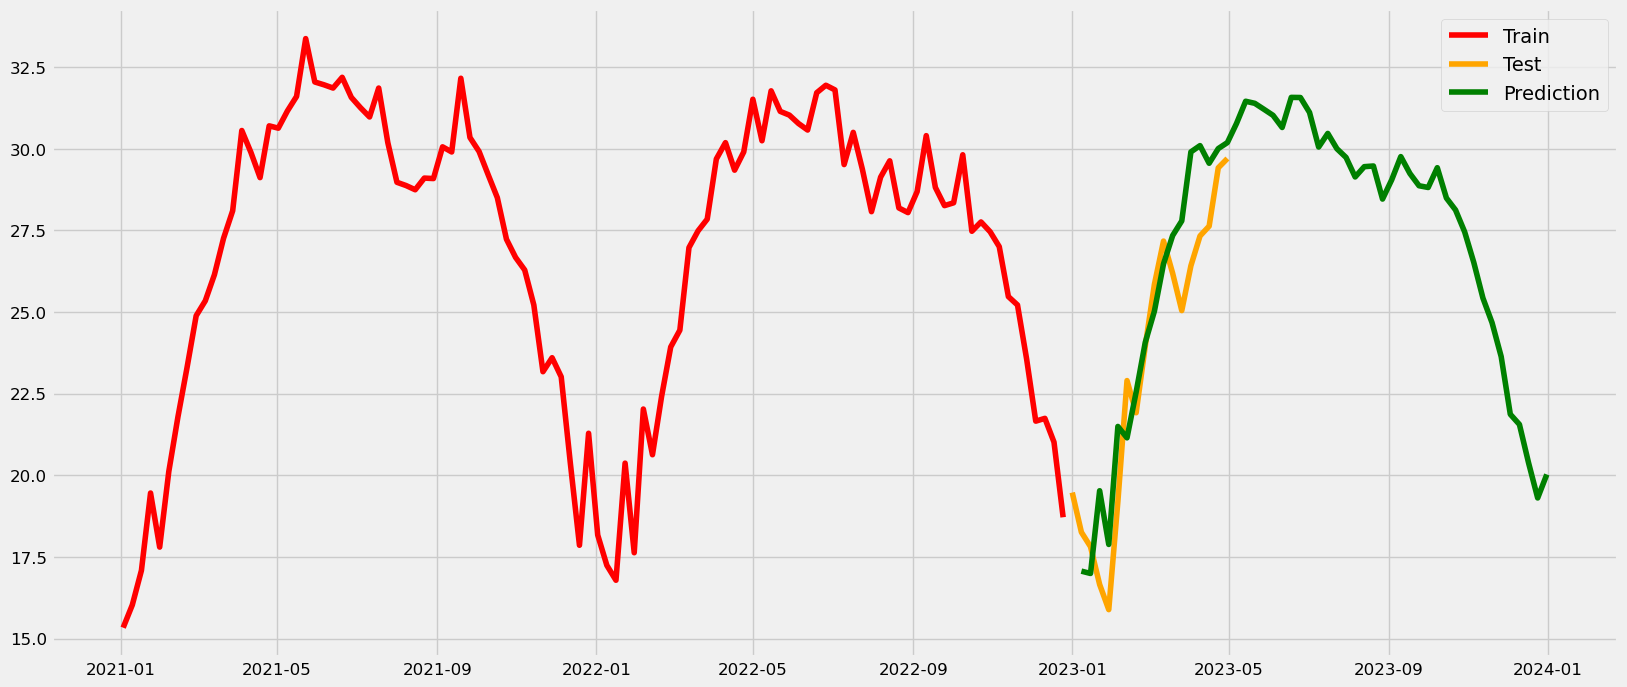

In [154]:
plt.plot(train.index, train.values,color="red", label='Train')
plt.plot(test.index, test.values,color="orange", label='Test')
plt.plot(futureX, preds, color="green",label='Prediction')
plt.legend()
plt.show()

We have used our RandomForestRegressor model to predict the values (start='01/04/2023', end='31/12/2023'.) The prediction using SARIMAX model is already shown in question 9. We can notice that both models are predicting the values in an expected manner. Visually, one can say that SARIMAX is able to capture the noise and fluctutions in the system better than RandomForestRegressor model as it has more edges and peaks.